In [4]:
## Correlção de Pearson linear
import pandas as pd
from random import *
import numpy as np

In [5]:
lista1 = []
for i in range (5000):
    a = float(gauss(0,10))
    lista1.append(a)

In [6]:
lista2 = []
for i in range (5000):
    a = float(gauss(15,2))
    lista2.append(a)

In [9]:
np.mean(lista1)

-0.21581378268103427

In [10]:
np.mean(lista2)

15.011346347277009

## Realizando o teste de normalidade de Shapiro Wilk

In [15]:
from scipy.stats import shapiro
stat1, p1 = shapiro(lista1)
if p1 > 0.05:
    print('A hipótese nula não pode ser rejeitada (os dados são normalmente distribuidas)')
else:
    print('A hipótese nula é rejeitada (os dados não são normalmente distribuidas)')    

A hipótese nula não pode ser rejeitada (os dados são normalmente distribuidas)


In [16]:
from scipy.stats import shapiro
stat2, p2 = shapiro(lista2)
if p2 > 0.05:
    print('A hipótese nula não pode ser rejeitada (os dados são normalmente distribuidas)')
else:
    print('A hipótese nula é rejeitada (os dados não são normalmente distribuidas)')    

A hipótese nula não pode ser rejeitada (os dados são normalmente distribuidas)


In [17]:
p1, p2

(0.1192760244011879, 0.996996283531189)

## Dadas variáveis normalizadas para alfa = 5%, então façamos a correlação de Pearson

In [25]:
from scipy.stats import pearsonr
r1, p3 = pearsonr(lista1, lista2)

if p3 > 0.05:
    print('A hipótese nula não pode ser rejeitada (não há relação entre as variáveis)')
else:
    print('A hipótese nula é rejeitada (há relação entre as variáveiss)')    

A hipótese nula não pode ser rejeitada (não há relação entre as variáveis)


In [24]:
r1, p3

(0.01212713680791622, 0.3912596676955687)

## Correlação Não linear

In [30]:
data = pd.read_csv(r"C:\Users\claud\Downloads\atlas2010_recorte.csv", decimal='.')


In [31]:
data

,uf,espvida,fectot,mort1,razdep,e_anosestudo
0,Rondonia,70.75,2.24,23.8,47.37,8.67
1,Rondonia,73.36,1.91,19.2,46.68,9.18
2,Rondonia,70.39,2.15,24.8,48.12,10.09
3,Rondonia,74.27,1.90,14.3,43.79,9.74
4,Rondonia,72.94,2.12,18.1,45.67,10.22
...,...,...,...,...,...,...
885,Piaui,69.57,2.67,29.2,59.93,7.94
886,Piaui,67.49,1.86,36.2,55.92,9.14
887,Piaui,66.10,2.45,41.5,55.68,8.50
888,Piaui,66.10,1.89,41.5,43.73,7.63


Text(0, 0.5, 'mort1')

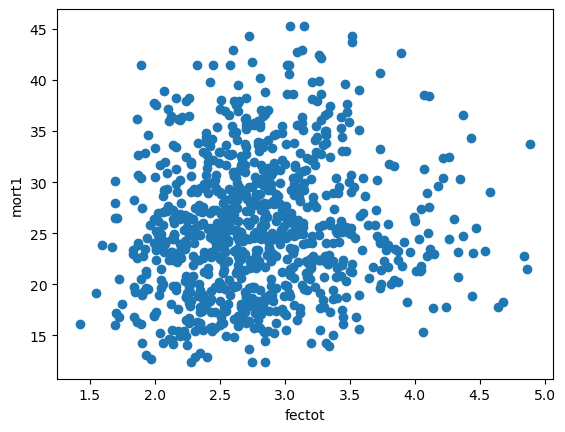

In [34]:
import matplotlib.pyplot as plt
plt.scatter(data.fectot, data.mort1)
plt.xlabel('fectot')
plt.ylabel('mort1')

In [40]:
import statsmodels.formula.api as sm
model = sm.ols(formula='fectot ~ mort1', data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 fectot   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     9.371
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00227
Time:                        23:31:19   Log-Likelihood:                -775.40
No. Observations:                 890   AIC:                             1555.
Df Residuals:                     888   BIC:                             1564.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5617      0.077     33.108      0.0